# Real Estate Listings in St. Petersburg Study.

We have data from the Yandex Real Estate service — an archive of apartment listings in St. Petersburg (Russia) and neighboring settlements for several years. For each apartment for sale, two types of data are available. The first is filled in by the user, the second is obtained automatically based on map data. For example, distance to the center, airport and other objects — this data is automatically obtained from geoservices. The number of parks and water bodies is also filled in without user participation.

**Study Objective**
* To conduct a research analysis of the data from the Yandex Real Estate service;
* To determine the market value of real estate objects in St. Petersburg and neighboring settlements based on the data obtained;
* To establish the parameters that affect the price of real estate objects;
* To provide recommendations for automating a system that will track anomalies and suspicious activity.



**Data Description**

The data is contained in the file `real_estate_data.csv`

* `airports_nearest` — distance to the nearest airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to the city center (m)
* `days_exposition` — number of days the listing was posted (from publication to removal)
* `first_day_exposition` — publication date
* `floor` — floor
* `floors_total` — total floors in the building
* `is_apartment` — apartment (boolean)
* `kitchen_area` — kitchen area in square meters (m²)
* `last_price` — price at the time of removal from publication
* `living_area` — living area in square meters (m²)
* `locality_name` — name of the locality
* `open_plan` — open plan (boolean)
* `parks_around3000` — number of parks within a radius of 3 km
* `parks_nearest` — distance to the nearest park (m)
* `ponds_around3000` — number of ponds within a radius of 3 km
* `ponds_nearest` — distance to the nearest pond (m)
* `rooms` — number of rooms
* `studio` — studio apartment (boolean)
* `total_area` — total area of the apartment in square meters (m²)
* `total_images` — number of photos of the apartment in the listing


**Research plan**

The study will be conducted in several stages:

1 — Data Review\
2 — Data Preprocessing\
3 — Exploratory Analysis\
4 — General Conclusion

## Loading and examination of data


In [1]:
#importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#сохраняем файл в отдельную переменную
data = pd.read_csv('real_estate_data.csv', sep='\t')

#expand the output area so that all columns are visible
pd.set_option('display.max_columns', None)
#set the setting to display numbers in float format
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')#disable warnings about changes in libraries
sns.set_palette("crest")#setting colors for the seaborn library

Let's display the first 5 rows of the table and apply the info() method

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сonstructing a histogram for all numeric columns of the table

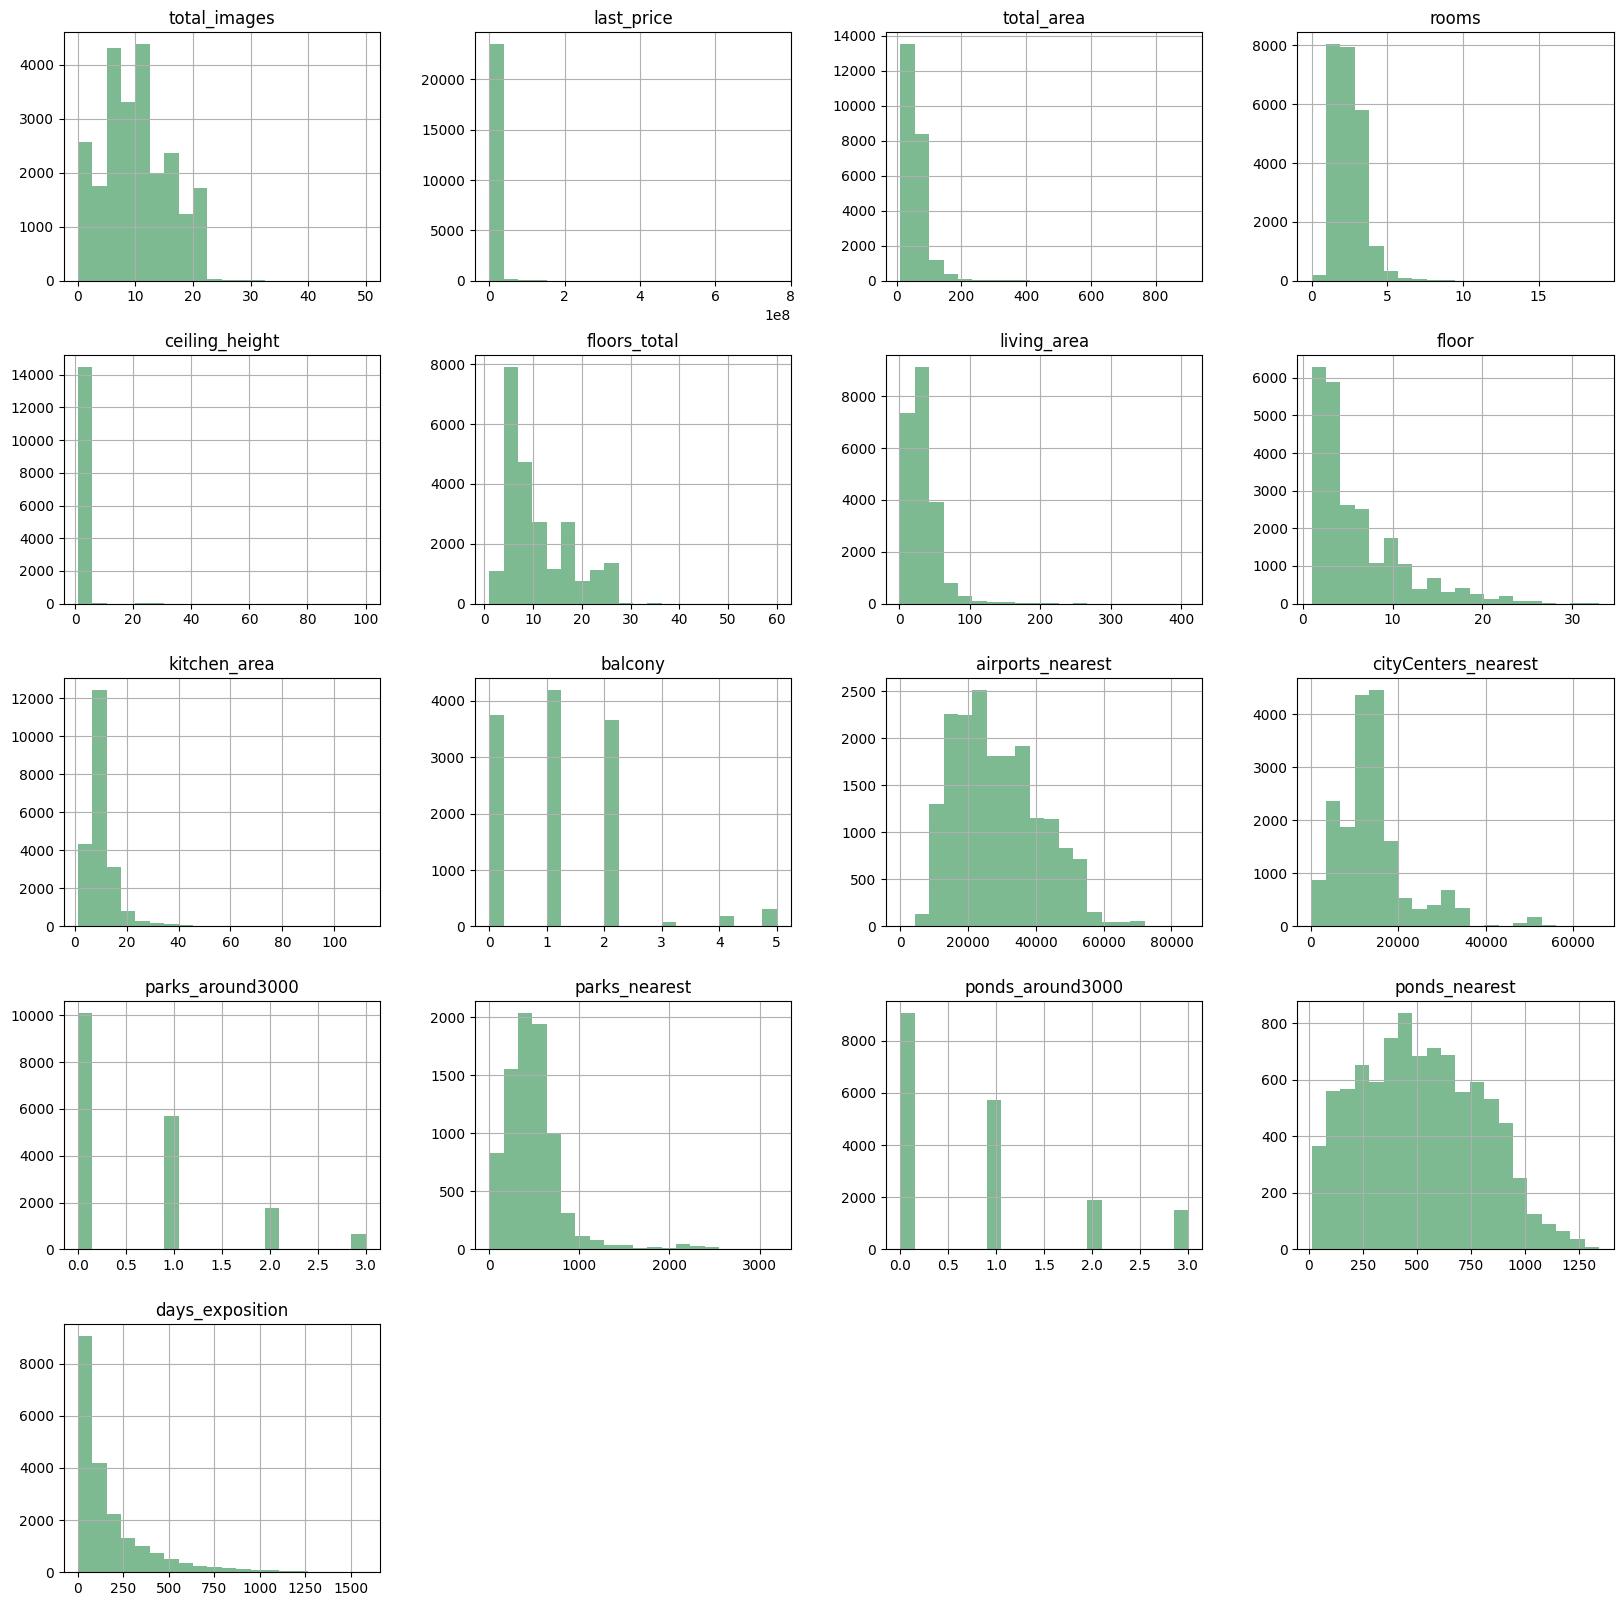

In [5]:
data.hist(bins=20, figsize=(20, 20));

### Interim conclusion

* It is clear from the general information about the data that there are multiple gaps in 14 columns out of 22.
* Also, not all columns have the correct data type. Only the `locality_name` column containing the names of locations should be of the object type. If the names were entered manually, then there may be errors and typos leading to implicit duplicates.
* An uppercase letter is used in the name `cityCenters_nearest`.

**It is necessary to fill in the gaps where possible, correct data types in the required columns, track and delete exact and partial duplicates, bring column names to snake case.**

* It can be seen from the histograms that there are very large outliers in many columns, for example, `last_price`, `ceiling_height`, so the graph has moved to the left.
* In the `cityCenters_nearest` column, a small peak is visible around the value of 30,000. It would be interesting to clarify its cause.

**It is necessary to track such anomalous values and, if errors are present, correct the values or delete them if it is impossible to select a correct value.**

Below we will preprocess the data and study the parameters more closely.

## Data preprocessing

### Converting column names to snake case

In [6]:
#rename column 'cityCenters_nearest'
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

### Filling in missing values

Let's look at the number of missing values for each column.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

From the data description, we know that two types of data are available for each apartment for sale:
* The first type is entered by the user.
* The second type is obtained automatically based on cartographic data. For example, the distance to the center, airport and other objects — this data is automatically obtained from geoservices. The number of parks and reservoirs is also filled in without user participation.

It can also be assumed that the number of days of accommodation in the `days_exposition` column is calculated automatically.

Let's divide the columns with gaps into two categories to better understand the reason for the gaps.


|User-entered data	          | Automatically obtained data   | 
|-----------------------------|-------------------------------|
| ceiling_height              | days_exposition               | 
| floors_total                | airports_nearest              | 
| living_area                 | cityCenters_nearest           | 
| is_apartment                | parks_around3000              | 
| kitchen_area                | parks_nearest                 | 
| balcony                     | ponds_around3000              | 
| locality_name               | ponds_nearest                 |

#### The category «Data entered by the user»

In the columns below, it can be assumed that the seller might not have known or forgot to enter information about the location name, ceiling height, number of floors in the building, total living area and kitchen area. **Let's leave such gaps for now.**

* `ceiling_height`
* `floors_total`
* `living_area`
* `kitchen_area`
* `locality_name`

---


The `balcony` column contains data on the number of balconies, but about half of the values (11,519 out of 23,699) are missing. Perhaps sellers of apartments without balconies simply do not fill in this field as unnecessary?

The `is_apartment` column contains Boolean data type and most of the values are missing (20,924 out of 23,699). Here, too, we can assume that sellers simply did not fill out this field if they did not need to mark their apartment as an apartment.

In these two columns, we will fill in the gaps:
* `balcony` — replace the gaps with `0` (no balcony);
* `is_apartment` — replace the gaps with `False` (not an apartment).

---

In [8]:
#fill in the blanks in the columns 'balcony' and 'is_apartment'
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Category "Data obtained automatically"

Now let's turn our attention to the automatically obtained columns. The description of the data can help to understand the reason for the gaps:

The columns below: distance to the center, airport and other objects — are automatically obtained from geoservices.
* `airports_nearest` — distance to the nearest airport in meters
In this case, the gap may indicate a strong distance from airports. **Conclusion: leave the gaps.**

* `city_centers_nearest` — distance to the city center
In this case, the gap may indicate a strong remoteness from the center or the absence of a city center as such (in suburban settlements). **Conclusion: leave the gaps.**

* `parks_around3000` — number of parks within a 3 km radius
A gap may mean there are no parks in the specified radius. **Conclusion: replace the gaps with 0.**



In [9]:
#fill the gaps in the column 'parks_around3000' with zeros
data['parks_around3000'] = data['parks_around3000'].fillna(0)

* `parks_nearest` — distance to the nearest park (m)
This column directly depends on the `parks_around3000` column. If there is no nearby park, then there should be a gap in the column. Let's check if the values match.

Let's sort the table by two conditions — zero value in `parks_around3000` and gap in `parks_nearest`.
Display the number of rows.

In [10]:
data.query('parks_nearest.isna() and parks_around3000 == 0').shape[0]

15620

Compare with the total number of 0's and blanks in the above columns

In [11]:
print('Number of null values in column \'parks_around3000\' —', data.query('parks_around3000 == 0')['parks_around3000'].count())
print('Number of missing values in a column \'parks_nearest\' —', data['parks_nearest'].isna().sum())

Number of null values in column 'parks_around3000' — 15624
Number of missing values in a column 'parks_nearest' — 15620


The difference in quantity is 4 lines, let's look at them.

In [12]:
#output all unique values of the 'parks_nearest' column, given that parks_around3000 is 0
data.query('parks_around3000 == 0')['parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

In [13]:
#counting these unique values
data.query('parks_around3000 == 0')['parks_nearest'].value_counts()

parks_nearest
3190.000    2
3064.000    1
3013.000    1
Name: count, dtype: int64

It turns out that these four lines do not contain a logical error. The parks are more than three kilometers away, so the 'parks_around3000' column shows `0`. **Conclusion: leave the gaps as is**.

`ponds_around3000` — the number of water bodies within a 3 km radius
`ponds_nearest` — distance to the nearest water body (m)

The situation is similar to the columns with parks. A gap in `ponds_around3000` may indicate the absence of a water body, and a gap in `ponds_nearest` depends on the value 0 in the `ponds_around3000` column.

**Let's fill in the gaps in `ponds_around3000`** with zeros and compare the resulting number of zero rows with the gaps in the second column.

In [14]:
#filling in the blanks in the column 'ponds_around3000'
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Let's sort the table by two conditions: a zero value in `ponds_around3000` and a gap in `ponds_nearest`\
Let's display the number of rows.

In [15]:
data.query('ponds_nearest.isna() and ponds_around3000 == 0').shape[0]

14589

Compare this with the total number of 0's and blanks in the above columns.

In [16]:
print('Number of null values in column \'ponds_around3000\' —', data.query('ponds_around3000 == 0')['ponds_around3000'].count())
print('Number of missing values in a column \'ponds_nearest\' —', data['ponds_nearest'].isna().sum())

Number of null values in column 'ponds_around3000' — 14589
Number of missing values in a column 'ponds_nearest' — 14589


Hooray, everything matches. Let's move on to the next column. **Conclusion - leave the gaps as is**

`days_exposition` — how many days the ad was posted (from publication to removal).

Perhaps this column is automatically filled in by the system after the ad is removed. We have a `first_day_exposition` column indicating the publication date, but there is no information about the day of removal.

Maybe the counter that counts the days between two dates (removal and publication) broke down and does not show certain values?

Let's look at the distribution of data within the column.

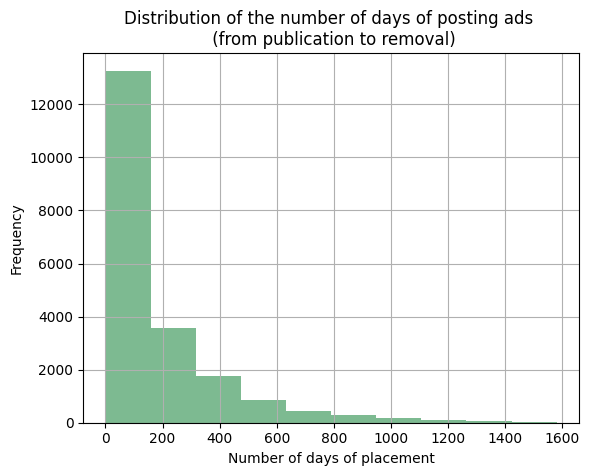

In [17]:
#creating а plot
data['days_exposition'].hist(bins=10)

#assigning axes and titles
plt.title('Distribution of the number of days of posting ads \n (from publication to removal)')
plt.xlabel('Number of days of placement') 
plt.ylabel('Frequency');

Let's limit the values ​​along the X axis to bring the values closer to zero:

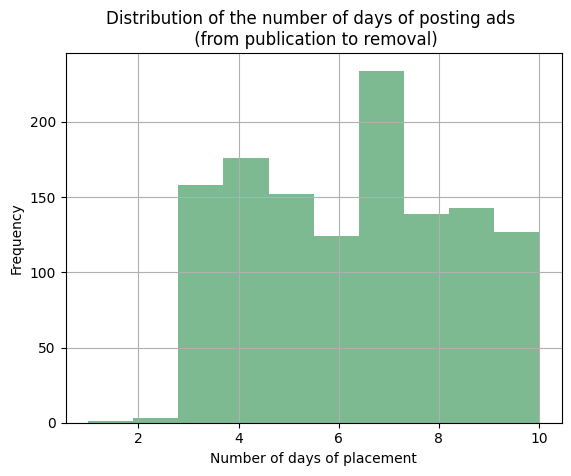

In [18]:
#creating а plot
data['days_exposition'].hist(bins=10, range=(1,10))

#assigning axes and titles
plt.title('Distribution of the number of days of posting ads \n (from publication to removal)')
plt.xlabel('Number of days of placement') 
plt.ylabel('Frequency');

There are suspiciously few ads that were posted for one or two days. Let's find out how many there are.

In [19]:
#data slice by given conditions - publication 1 or 2 days
data[data['days_exposition'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19,4000000.000,49.900,2019-05-01T00:00:00,2,2.500,9.000,25.000,1,False,False,False,10.000,0.000,Санкт-Петербург,13567.000,14384.000,1.000,20.000,1.000,681.000,1.000
13061,20,6100000.000,51.400,2019-04-29T00:00:00,2,3.000,5.000,31.700,4,False,False,False,6.900,1.000,Санкт-Петербург,10776.000,9389.000,0.000,NaN,0.000,NaN,2.000
16053,4,4070000.000,45.100,2019-04-30T00:00:00,2,NaN,5.000,22.700,3,False,False,False,6.600,0.000,Санкт-Петербург,40859.000,11668.000,2.000,485.000,0.000,NaN,2.000
16212,0,7806000.000,25.000,2019-04-30T00:00:00,1,3.000,5.000,NaN,5,False,False,False,NaN,0.000,Санкт-Петербург,36525.000,10302.000,0.000,NaN,0.000,NaN,2.000


Выведем итоговое количество пропущенных значений для каждого столбца.

There are only 4 rows. There is a chance that an error occurred when subtracting dates.
At the same time, we cannot fill in the gaps, since we do not know what is more correct to put — 1 day or 2.
In this case, it is worth clarifying with the customer of the study how the data was collected to understand the nature of the gaps.
**Conclusion — leave the data as it is**

Let's display the total number of missing values for each column.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Changing data types

Let's display information about the data type in the dataframe again.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* `first_day_exposition` — the column contains dates. Change the object type to datetime64.

* `floors_total`— the column contains information about the number of floors in a building. We would like to bring it to the integer type int, but since this column has NaN values (which belong to the float64 type), we will have to leave it.

* `balcony` - the number of balconies is an integer. Let's change the float64 type to int64.

* `parks_around3000` - the number of parks is an integer. Let's change the float64 type to int64.

* `ponds_around3000` - the number of water bodies is an integer. Let's change the float64 type to int64.

* `days_exposition` —  the number of days is an integer. But since there are NaN values in this column, we leave it as it is.

* Finally, for all columns with the `float64` type, let's change it to `float32`.

In [22]:
#replacing data types for the required columns
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#create a list of columns with type float64
change_to_float23_list = ['last_price',
                          'total_area',
                          'ceiling_height',
                          'floors_total',
                          'living_area',
                          'kitchen_area',
                          'airports_nearest',
                          'city_centers_nearest',
                          'parks_nearest',
                          'days_exposition',
                          'ponds_nearest'
                         ]

#change the type from float64 to float32 for the columns specified in the sheet
for column in change_to_float23_list:
    data[column] = data[column].astype('float32')

Let's check if everything worked out:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

Everything is fine. We can move on to the next step.

### Finding and removing duplicate records

#### Finding exact duplicate rows:

In [24]:
#looking for completely matching lines and count them
data.duplicated().sum()

0

There are no completely matching lines.

#### Finding partial duplicates

Duplicates may be in the `locality_name` column, as it is the only column of type `object`, it contains names of localities, which may contain errors and typos.

In [25]:
#create a variable with all unique values of the 'locality_name' column, excluding NaN, and sort them alphabetically
locality_names_unique = np.sort(data[~data['locality_name'].isna()]['locality_name'].unique())

print('\033[1m' + 'Number of unique values in the column \'locality_name\' before searching for duplicates —', len(locality_names_unique))

Number of unique values in the column 'locality_name' before searching for duplicates — 364


In [26]:
#display all unique cvalues on the screen in a convenient form
for name in locality_names_unique:
    print(name)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

**Observations:**

Some names indicate settlement types, while others do not. This creates unnecessary variants of location names.
For example, `Veshchevo` and `settlement of the Veshchevo station` are the same settlement.
**Let's remove settlement types.**

Also, spelling variants with the letter "ё" are often found in names. For example, `поселок` and `посёлок`.
**Replace the letters `ё` with `e`**

In [27]:
#let's create a sheet with the names of settlement types
cut_names_list = ['село ',
                  'садовое товарищество ',
                  'садоводческое некоммерческое товарищество ',
                  'городской поселок ',
                  'деревня ',
                  'коттеджный поселок ',
                  'поселок имени ',
                  'поселок городского типа ',
                  'поселок при железнодорожной станции ',
                  'поселок станции ',
                  'поселок ']

#replace `ё` with `е` and cut off settlement types
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(cut_names_list, '', regex=True)

In [28]:
#update the variable
locality_names_unique = np.sort(data[~data['locality_name'].isna()]['locality_name'].unique())

#display all unique cvalues on the screen in a convenient form
for name in locality_names_unique:
    print(name)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпоселок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичево
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
К

**The similarity of spelling of the following pairs may raise doubts:**\
Kommunar and Kommunary\
Kingisep and Kingiseppsky\
Kuzmolovo and Kuzmolovsky\
Nikolsky and Nikolskoye\
Pavlovo and Pavlovsk\
Pikalevo and Pikkolovo

In all cases, an internet search suggests that these are two different settlements in the Leningrad Region.

Let's derive the total number of unique names.

In [29]:
print('\033[1m' + 'Number of unique values in the column \'locality_name\' after searching for duplicates —', len(locality_names_unique))

Number of unique values in the column 'locality_name' after searching for duplicates — 305


### Adding new columns

Let's create the following columns:

* `square_meter_price` — price of one square meter
* `weekday` — day of the week of the ad publication
* `month` — month of the ad publication
* `year` — year of the ad publication
* `floor_category` — type of apartment floor
* `city_centers_nearest_km` — distance to the city center in kilometers

In [30]:
#create columns 'square_meter_price', 'weekday', 'month', 'year'
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [31]:
def floor_group(row):
    '''
    function divides into three categories:
    'first', 'last', 'other'
    depending on the floor of the apartment and the number of floors in the building
    '''
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

#create the 'floor_category' column using the floor_group function
data['floor_category'] = data.apply(floor_group, axis=1)

Let's display the first 5 rows of the supplemented table:

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,120370.367,3,3,2019,16.000,other
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,82920.789,1,12,2018,19.000,first
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,92785.711,3,8,2015,14.000,other
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.000,6800.000,2,84.000,3,234.000,424.000,408176.094,4,7,2015,7.000,other
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,100000.000,1,6,2018,8.000,other


New columns are in place.

### Interim conclusion

We have prepared the data for work:

* Brought the names to a uniform spelling.
* Checked the data for gaps, filled in the gaps where appropriate with suitable values.
* Checked the data for obvious and hidden duplicates, processed hidden duplicates in the `locality_name` column.
* Corrected the data types.
* Added new columns:
    * `square_meter_price` - the price of one square meter;
    * `weekday` - the day of the week the ad was published;
    * `month` - the month the ad was published;
    * `year` - the year the ad was published;
    * `floor_category` - the type of apartment floor;
    * `city_centers_nearest_km` - the distance to the city center in kilometers.

## Exploratory data analysis

### Analysis of the main parameters

#### Total area
Let's apply the describe() method to the column and build a histogram

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

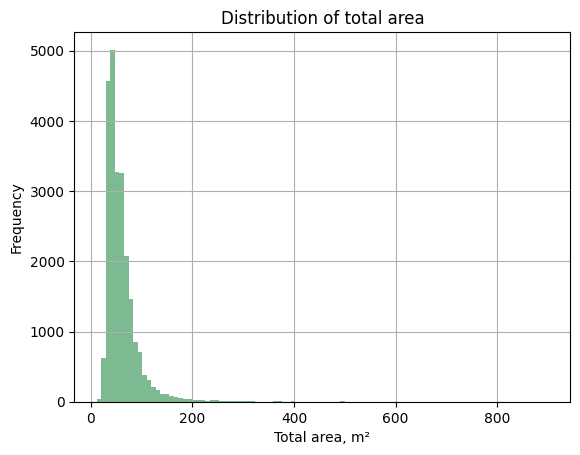

In [33]:
display(data['total_area'].describe())
data['total_area'].hist(bins=100)

#assigning axes and titles
plt.title('Distribution of total area')
plt.ylabel('Frequency')
plt.xlabel('Total area, m²');

The maximum value of the `total_area` column (900 sq. m) is much larger than most other values, so the histogram is heavily shifted to the left.
Let's eliminate the values that are too large big and look at the rest.

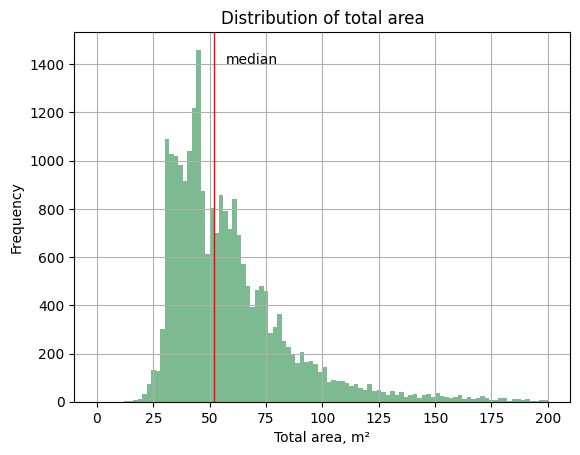

In [34]:
data['total_area'].hist(bins=100, range=(0,200))

plt.axvline(data['total_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(data['total_area'].median() + 5,1400,'median',rotation=0)

#assigning axes and titles
plt.title('Distribution of total area')
plt.ylabel('Frequency')
plt.xlabel('Total area, m²');

Several peaks are visible in the area of 30, 45 and 60 m², perhaps this is related to typical apartment layouts?

Let's cut off the values aIt looks like some of the people filling out the form rounded the values, and we see some small peaks at whole values.

Let's create a separate column where we round the area values ​​to whole m². Let's look at the most common values.round the peaks and take a closer look at the histogram.

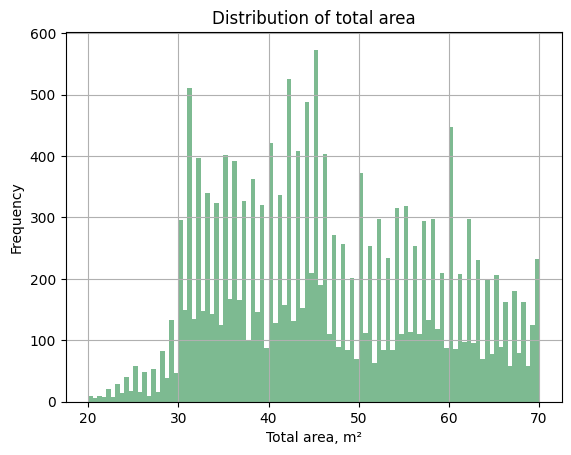

In [35]:
data['total_area'].hist(bins=100, range=(20,70))

#assigning axes and titles
plt.title('Distribution of total area')
plt.ylabel('Frequency')
plt.xlabel('Total area, m²');

It looks like some of the people filling out the form rounded the values, and we see some small peaks at whole values.

Let's create a separate column where we round the area values ​​to whole m². Let's look at the most common values.

In [36]:
#create a column with rounded values
data['total_area_rounded'] = round(data['total_area'], 0)

#display the most common unique values from the new column
data['total_area_rounded'].value_counts().head(10)

total_area_rounded
45.000    721
42.000    718
44.000    702
46.000    628
31.000    626
36.000    599
32.000    573
60.000    552
40.000    546
43.000    504
Name: count, dtype: int64

Lets display the 10 largest real estate objects on the screen.

In [37]:
data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded
19540,8,420000000.000,900.000,2017-12-06,12,2.800,25.000,409.700,25,False,False,False,112.000,0,Санкт-Петербург,30706.000,7877.000,0,NaN,2,318.000,106.000,466666.625,2,12,2017,8.000,last,900.000
12859,20,140000000.000,631.200,2019-04-09,7,3.900,4.000,322.300,4,False,False,False,19.500,1,Санкт-Петербург,25707.000,4972.000,0,NaN,2,210.000,NaN,221799.766,1,4,2019,5.000,last,631.000
3117,19,140000000.000,631.000,2019-03-30,7,NaN,5.000,NaN,5,False,False,False,60.000,0,Санкт-Петербург,25707.000,4972.000,0,NaN,2,210.000,NaN,221870.047,5,3,2019,5.000,last,631.000
15651,20,300000000.000,618.000,2017-12-18,7,3.400,7.000,258.000,5,False,False,False,70.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,111.000,485436.906,0,12,2017,5.000,other,618.000
5358,20,65000000.000,590.000,2019-02-14,15,3.500,6.000,409.000,3,False,False,False,100.000,0,Санкт-Петербург,24447.000,4666.000,1,767.000,0,NaN,14.000,110169.492,3,2,2019,5.000,other,590.000
4237,1,50000000.000,517.000,2017-10-14,7,NaN,4.000,332.000,3,False,False,False,22.000,0,Санкт-Петербург,22835.000,1847.000,2,477.000,2,540.000,NaN,96711.797,5,10,2017,2.000,other,517.000
8018,20,84000000.000,507.000,2015-12-17,5,4.450,7.000,301.500,7,True,False,False,45.500,1,Санкт-Петербург,NaN,5735.000,2,110.000,0,NaN,1078.000,165680.469,3,12,2015,6.000,last,507.000
5893,3,230000000.000,500.000,2017-05-31,6,NaN,7.000,NaN,7,False,False,False,40.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,50.000,460000.000,2,5,2017,5.000,last,500.000
15016,8,150000000.000,500.000,2016-01-13,4,3.200,7.000,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058.000,6150.000,3,209.000,3,531.000,303.000,300000.000,2,1,2016,6.000,last,500.000
12401,20,91500000.000,495.000,2017-06-19,7,4.650,7.000,347.500,7,False,False,False,25.000,0,Санкт-Петербург,NaN,5735.000,2,110.000,0,NaN,14.000,184848.484,0,6,2017,6.000,last,495.000


All properties are located in St. Petersburg and often on the top floor and have from 4 to 15 rooms.
Apparently, these are mainly penthouses in elite residential complexes.

**We will cut off abnormally large values of 300 m² and more**

In [38]:
data = data.query('total_area <= 300 or total_area.isna()')

**Observation:**
The most common apartment sizes are 42 and 46 m².

#### Living area

Let's apply the describe() method to the column and build a histogram

count   21748.000
mean       34.035
std        19.860
min         2.000
25%        18.600
50%        30.000
75%        42.200
max       250.000
Name: living_area, dtype: float64

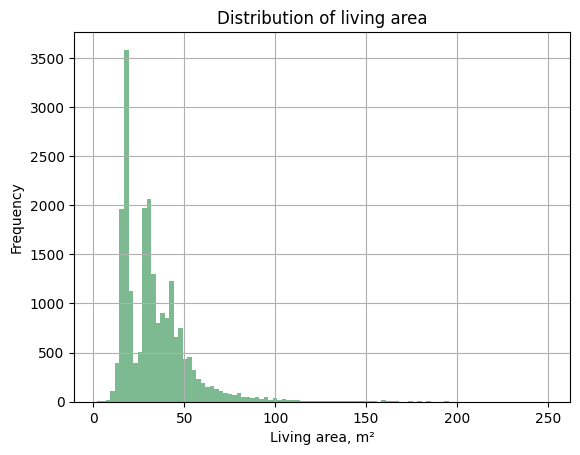

In [39]:
display(data['living_area'].describe())
data['living_area'].hist(bins=100)

#assigning axes and titles
plt.title('Distribution of living area')
plt.ylabel('Frequency')
plt.xlabel('Living area, m²');

Let's exclude the values ​​that are too large and look at the rest:

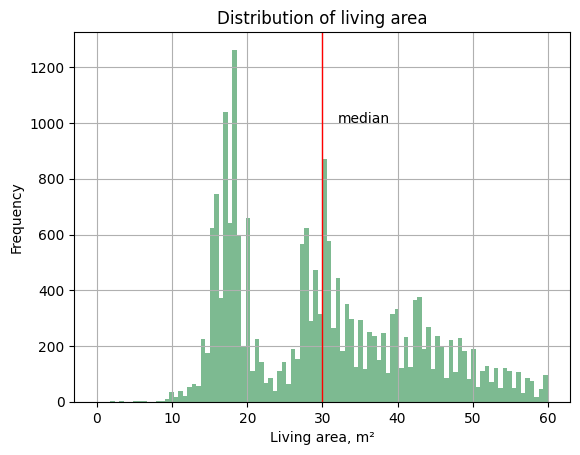

In [40]:
data['living_area'].hist(bins=100, range=(0,60))

plt.axvline(data['living_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(32,1000,'median',rotation=0)

#assigning axes and titles
plt.title('Distribution of living area')
plt.ylabel('Frequency')
plt.xlabel('Living area, m²');

Three distinct peaks are visible in the area of 18, 30 (median) and 45 m², perhaps this is also related to typical layouts?

Let's cut off the values ​​around the peaks and take a closer look at the histogram.

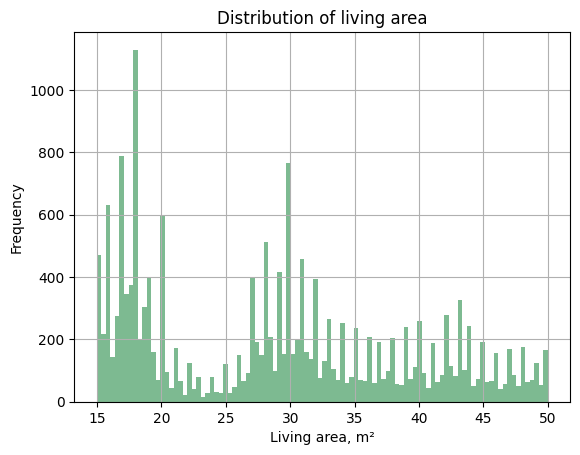

In [41]:
data['living_area'].hist(bins=100, range=(15,50))

#assigning axes and titles
plt.title('Distribution of living area')
plt.ylabel('Frequency')
plt.xlabel('Living area, m²');

Again, we can see an increase in density for integer values. \
As in the case of `total_area`, we will create a separate column with rounded values.

In [42]:
#create a column with rounded values
data['living_area_rounded'] = round(data['living_area'], 0)

#display the most common unique values from the new column
data['living_area_rounded'].value_counts().head(15)

living_area_rounded
18.000    1805
17.000    1251
30.000    1147
16.000    1081
28.000     890
20.000     796
19.000     722
31.000     711
32.000     648
15.000     645
27.000     614
29.000     595
42.000     472
43.000     469
40.000     461
Name: count, dtype: int64

Display the 10 largest values ​​in the column.

In [43]:
data.sort_values(by='living_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
15701,12,83000000.000,293.600,2017-11-10,4,NaN,9.000,250.000,7,False,False,False,35.000,0,Санкт-Петербург,25593.000,5913.000,2,164.000,0,NaN,NaN,282697.531,4,11,2017,6.000,other,294.000,250.000
16915,14,29000000.000,292.200,2017-01-12,9,3.350,5.000,225.900,4,False,False,False,32.900,1,Санкт-Петербург,24892.000,5162.000,2,263.000,0,NaN,825.000,99247.094,3,1,2017,5.000,other,292.000,226.000
7857,11,150000000.000,230.000,2017-10-25,8,NaN,8.000,220.000,8,False,False,False,NaN,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,135.000,652173.938,2,10,2017,6.000,last,230.000,220.000
21685,7,22160000.000,277.600,2017-08-19,7,3.800,6.000,211.000,3,False,False,False,17.800,0,Санкт-Петербург,25761.000,5671.000,2,375.000,1,479.000,22.000,79827.078,5,8,2017,6.000,other,278.000,211.000
10246,10,25023000.000,253.700,2017-11-10,6,NaN,4.000,200.000,2,False,False,False,33.000,0,Санкт-Петербург,20687.000,1214.000,3,103.000,3,155.000,90.000,98632.242,4,11,2017,1.000,other,254.000,200.000
22907,9,65000000.000,228.000,2016-06-02,4,NaN,5.000,200.000,2,False,False,False,NaN,0,Санкт-Петербург,22783.000,1295.000,3,619.000,3,269.000,NaN,285087.719,3,6,2016,1.000,other,228.000,200.000
6728,10,55000000.000,280.000,2018-03-22,7,4.400,6.000,195.000,5,False,False,False,22.000,1,Санкт-Петербург,32534.000,4725.000,0,NaN,2,594.000,406.000,196428.578,3,3,2018,5.000,other,280.000,195.000
4199,8,24900000.000,281.100,2018-02-21,6,3.300,5.000,193.500,3,False,False,False,26.600,0,Санкт-Петербург,21480.000,2453.000,3,75.000,1,795.000,126.000,88580.578,2,2,2018,2.000,other,281.000,194.000
7694,4,30000000.000,251.000,2017-07-27,7,3.500,5.000,193.000,4,False,False,False,21.000,0,Санкт-Петербург,22068.000,3334.000,0,NaN,1,802.000,613.000,119521.906,3,7,2017,3.000,other,251.000,193.000
18891,11,40000000.000,290.000,2016-06-21,10,3.500,6.000,189.400,6,False,False,False,30.000,1,Санкт-Петербург,26229.000,4932.000,3,316.000,1,227.000,77.000,137931.031,1,6,2016,5.000,last,290.000,189.000


As in the `total_area` column, all objects are multi-room premises in St. Petersburg.\
We will cut off abnormally large values of 150 m² and more.

In [44]:
data = data.query('living_area <= 150 or living_area.isna()')

**Observation:** The most common living space sizes are 18, 17 and 30 m².

#### Kitchen_area

Let's apply the describe() method to the column and build a histogram

count   21302.000
mean       10.457
std         5.571
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       107.000
Name: kitchen_area, dtype: float64

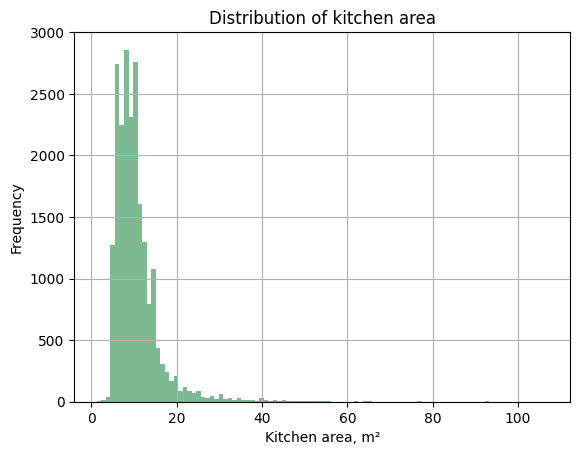

In [45]:
display(data['kitchen_area'].describe())

data['kitchen_area'].hist(bins=100)

#assigning axes and titles
plt.title('Distribution of kitchen area')
plt.ylabel('Frequency')
plt.xlabel('Kitchen area, m²');

Как обычно отсечем излишне высокие значения.

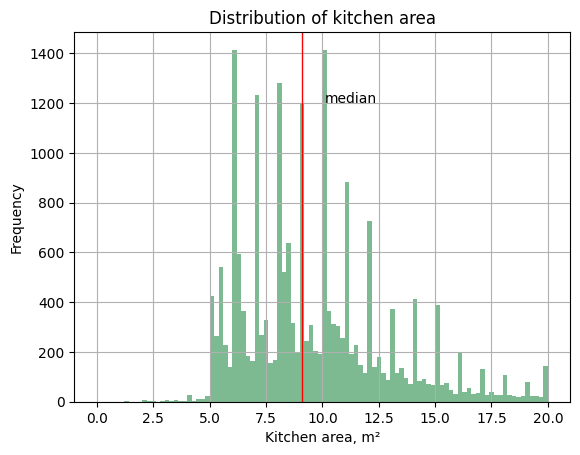

In [46]:
data['kitchen_area'].hist(bins=100, range=(0,20))

plt.axvline(data['kitchen_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(data['kitchen_area'].median()+1,1200,'median',rotation=0)

#assigning axes and titles
plt.title('Distribution of kitchen area')
plt.ylabel('Frequency')
plt.xlabel('Kitchen area, m²');

In [47]:
#display the most frequently occurring unique values from the new column
data['kitchen_area'].value_counts().head(10)

kitchen_area
6.000     1300
10.000    1261
8.000     1110
9.000     1101
7.000     1062
11.000     797
12.000     661
8.500      415
5.500      400
14.000     381
Name: count, dtype: int64

We'll display 10 properties with the largest kitchens.

In [48]:
data.sort_values(by='kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
20215,2,85000000.000,249.700,2018-02-01,3,NaN,10.000,72.000,9,False,False,False,107.000,4,Санкт-Петербург,31532.000,4624.000,1,2218.000,2,99.000,26.000,340408.469,3,2,2018,5.000,other,250.000,72.000
16239,5,82400000.000,181.100,2017-05-24,3,3.900,9.000,58.200,4,False,False,False,93.200,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,501.000,454997.188,2,5,2017,6.000,other,181.000,58.000
16797,9,65850000.000,146.000,2017-07-14,2,NaN,9.000,40.000,3,False,False,False,93.000,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,77.000,451027.406,4,7,2017,6.000,other,146.000,40.000
10867,1,56844500.000,177.900,2015-01-15,3,NaN,6.000,87.200,5,True,False,False,87.200,0,Санкт-Петербург,21860.000,318.000,2,160.000,3,569.000,NaN,319530.656,3,1,2015,0.000,other,178.000,87.000
492,18,95000000.000,216.000,2017-12-05,4,3.000,5.000,86.000,4,False,False,False,77.000,0,Санкт-Петербург,21740.000,436.000,2,138.000,3,620.000,14.000,439814.812,1,12,2017,0.000,other,216.000,86.000
4394,20,57000000.000,174.000,2015-11-09,3,3.200,10.000,95.000,6,False,False,False,77.000,0,Санкт-Петербург,31706.000,4166.000,1,193.000,3,199.000,1039.000,327586.219,0,11,2015,4.000,other,174.000,95.000
14644,17,47000000.000,150.000,2017-02-28,4,3.700,6.000,58.000,5,False,False,False,75.000,1,Санкт-Петербург,16085.000,7616.000,0,NaN,0,NaN,507.000,313333.344,1,2,2017,8.000,other,150.000,58.000
16647,15,122000000.000,145.000,2017-04-25,3,3.300,6.000,36.000,2,False,False,False,72.000,0,Санкт-Петербург,33931.000,7023.000,2,478.000,3,250.000,335.000,841379.250,1,4,2017,7.000,other,145.000,36.000
6193,19,24300000.000,230.000,2016-06-03,4,NaN,3.000,90.000,2,False,False,False,70.000,0,Санкт-Петербург,39422.000,15354.000,0,NaN,1,345.000,397.000,105652.172,4,6,2016,15.000,other,230.000,90.000
18447,17,21800000.000,187.000,2018-01-14,5,NaN,4.000,120.000,4,False,False,False,65.000,0,Санкт-Петербург,43758.000,15461.000,1,756.000,2,278.000,NaN,116577.539,6,1,2018,15.000,last,187.000,120.000


Nothing abnormal.
We will cut off abnormally large values of 40 m² and more.

In [49]:
data = data.query('kitchen_area <= 40 or kitchen_area.isna()')

**Observation:** The most common kitchen sizes are 6, 10 and 8 m².

#### Last price
Let's apply the describe() method to the column and build a histogram

count       23453.000
mean      6064854.000
std       6693556.000
min        430000.000
25%       3400000.000
50%       4600000.000
75%       6699000.000
max     330000000.000
Name: last_price, dtype: float64

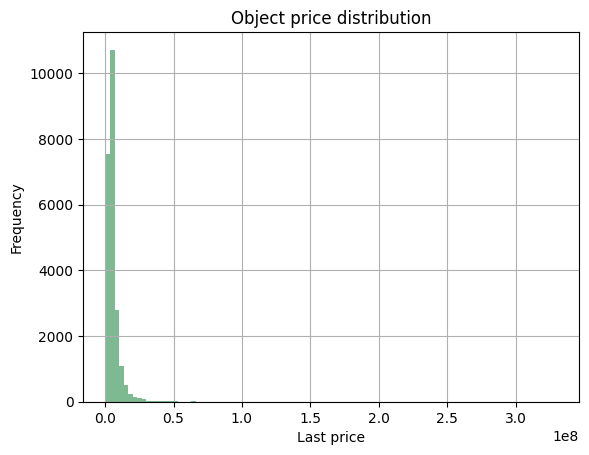

In [50]:
display(data['last_price'].describe())
data['last_price'].hist(bins=100)

#assigning axes and titles
plt.title('Object price distribution')
plt.ylabel('Frequency')
plt.xlabel('Last price');

Let's divide the values ​​of this column by 1 million to make them more convenient.

In [51]:
data['last_price'] = data['last_price']/1000000

As usual, we will cut off abnormally high values

In [52]:
display(data['last_price'].describe())

count   23453.000
mean        6.065
std         6.694
min         0.430
25%         3.400
50%         4.600
75%         6.699
max       330.000
Name: last_price, dtype: float64

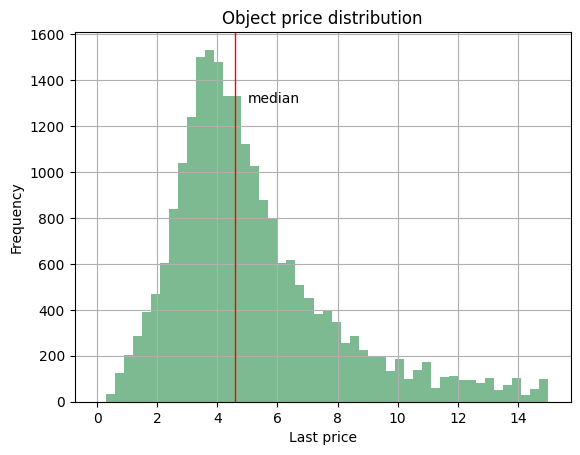

In [53]:
data['last_price'].hist(bins=50,range=(0,15))

plt.axvline(data['last_price'].median(), color='r', linestyle='-', linewidth=1)
plt.text(5,1300,'median',rotation=0)

#assigning axes and titles
plt.title('Object price distribution')
plt.ylabel('Frequency')
plt.xlabel('Last price');

The distribution looks normal, with one peak slightly to the left of the median, around 3.5 million.\
Let's look at the highest and lowest values and look for anomalies.

In [54]:
#highest values
data.sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
1436,19,330.000,190.000,2018-04-04,3,3.500,7.000,95.000,5,False,False,False,40.000,0,Санкт-Петербург,23011.000,1197.000,3,519.000,3,285.000,233.000,1736842.125,2,4,2018,1.000,other,190.000,95.000
22831,18,289.238,187.500,2019-03-19,2,3.370,6.000,63.700,6,False,False,False,30.200,0,Санкт-Петербург,22494.000,1073.000,3,386.000,3,188.000,NaN,1542604.750,1,3,2019,1.000,last,188.000,64.000
8900,13,190.870,268.000,2016-03-25,3,NaN,8.000,132.000,7,False,False,False,40.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,901.000,712201.500,4,3,2016,5.000,other,268.000,132.000
19155,20,160.000,243.000,2018-11-12,5,NaN,5.000,145.000,4,False,False,False,33.000,0,Санкт-Петербург,22640.000,555.000,3,285.000,1,200.000,18.000,658436.188,0,11,2018,1.000,other,243.000,145.000
2536,16,159.984,242.400,2015-08-27,4,3.850,9.000,131.000,7,False,False,False,20.000,0,Санкт-Петербург,21946.000,2242.000,1,679.000,1,227.000,501.000,660000.000,3,8,2015,2.000,other,242.000,131.000
12674,16,140.000,241.000,2015-07-24,5,3.000,5.000,NaN,4,False,False,False,NaN,0,Санкт-Петербург,23512.000,3503.000,3,413.000,3,83.000,399.000,580912.875,4,7,2015,4.000,other,241.000,NaN
13864,20,130.000,231.000,2015-08-13,6,3.600,6.000,148.000,4,False,False,False,12.000,0,Санкт-Петербург,22992.000,1280.000,3,395.000,3,170.000,467.000,562770.562,3,8,2015,1.000,other,231.000,148.000
20349,17,124.480,267.700,2016-06-18,4,NaN,8.000,107.030,8,False,False,False,29.860,0,Санкт-Петербург,27102.000,7442.000,2,164.000,2,473.000,205.000,464998.125,5,6,2016,7.000,last,268.000,107.000
21023,17,124.350,248.700,2015-08-27,4,3.400,9.000,131.000,4,False,False,False,23.000,0,Санкт-Петербург,21946.000,2242.000,1,679.000,1,227.000,501.000,500000.000,3,8,2015,2.000,other,249.000,131.000
4996,20,124.000,124.500,2017-10-12,4,3.000,4.000,67.200,2,False,False,False,20.000,0,Санкт-Петербург,20399.000,1722.000,3,302.000,3,172.000,45.000,995983.938,3,10,2017,2.000,other,124.000,67.000


Overall, everything is logical, again some kind of elite housing in St. Petersburg.

In [55]:
#lowest values
data.sort_values(by='last_price', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
17456,7,0.430,30.400,2019-04-22,1,NaN,2.000,16.000,1,False,False,False,6.000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144.740,0,4,2019,NaN,first,30.000,16.000
14911,5,0.430,54.000,2018-06-26,2,NaN,3.000,NaN,3,False,False,False,NaN,0,Свирь,NaN,NaN,0,NaN,0,NaN,44.000,7962.960,1,6,2018,NaN,last,54.000,NaN
16274,18,0.440,40.000,2018-07-10,1,NaN,5.000,NaN,1,False,False,False,NaN,0,Старополье,NaN,NaN,0,NaN,0,NaN,45.000,11000.000,1,7,2018,NaN,first,40.000,NaN
17676,0,0.450,36.500,2018-02-01,1,NaN,5.000,17.300,4,False,False,False,8.500,1,Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.000,12328.770,3,2,2018,NaN,other,36.000,17.000
16219,14,0.450,38.500,2018-07-11,2,2.650,2.000,NaN,1,False,False,False,NaN,0,Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.000,11688.310,2,7,2018,NaN,first,38.000,NaN
5698,7,0.450,42.000,2017-07-31,2,NaN,1.000,23.000,1,False,False,False,5.800,0,Будогощь,NaN,NaN,0,NaN,0,NaN,233.000,10714.290,0,7,2017,NaN,first,42.000,23.000
9581,7,0.450,43.400,2018-08-31,2,NaN,5.000,30.300,3,False,False,False,5.500,0,Старополье,NaN,NaN,0,NaN,0,NaN,96.000,10368.660,4,8,2018,NaN,other,43.000,30.000
21912,0,0.470,37.000,2018-02-18,1,NaN,3.000,NaN,3,False,False,False,NaN,0,Совхозный,NaN,NaN,0,NaN,0,NaN,45.000,12702.700,6,2,2018,NaN,last,37.000,NaN
23484,11,0.470,44.500,2018-07-02,2,NaN,2.000,28.000,2,False,False,False,7.500,0,Сланцы,NaN,NaN,0,NaN,0,NaN,298.000,10561.800,0,7,2018,NaN,last,44.000,28.000
18867,1,0.470,41.000,2018-02-11,1,NaN,5.000,32.000,3,False,False,False,9.000,0,Выскатка,NaN,NaN,0,NaN,0,NaN,46.000,11463.420,6,2,2018,NaN,other,41.000,32.000


Let's remove abnormally high values of 25 million and above.

In [56]:
data = data.query('last_price <= 25 or last_price.isna()')

**Observation:** The most common price is around 3.5 million.

#### Number of rooms
Let's apply the describe() method to the column and build a histogram

count   23131.000
mean        2.019
std         0.990
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        11.000
Name: rooms, dtype: float64

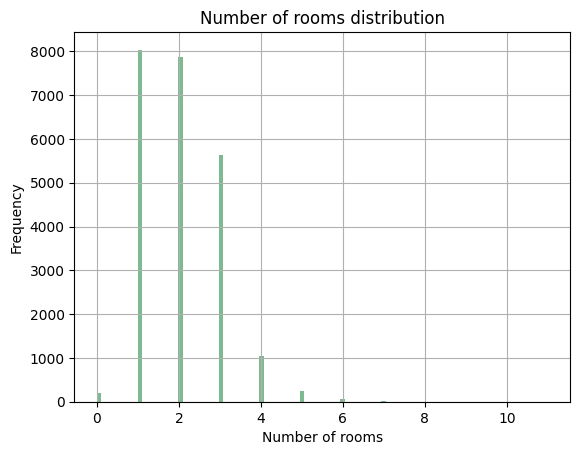

In [57]:
display(data['rooms'].describe())
data['rooms'].hist(bins=100)

#assigning axes and titles
plt.title('Number of rooms distribution')
plt.ylabel('Frequency')
plt.xlabel('Number of rooms');

Since this column only contains integer values ​​from 0 to 19, it will be clearer to use the method of counting unique values.

In [58]:
data['rooms'].value_counts()

rooms
1     8037
2     7880
3     5635
4     1055
5      237
0      196
6       61
7       24
8        3
11       1
10       1
9        1
Name: count, dtype: int64

You may see the negative correlation between the number of ads and the number of rooms.

Also, 196 ads indicate 0 as the number of rooms. There is a hypothesis that these are owners of studios and apartments with a free layout. Let's study the relationship between these columns.

In [59]:
#number of rows with a value of 0 in the 'rooms' column that are not marked as 'studio' or 'open plan'
len(data.query('rooms == 0 and studio != True and open_plan != True'))

0

There are no such lines. So the hypothesis is correct.

Since both room options still have a room, albeit without partitions (the kitchen and living room are combined into a single space), we will change 0 to 1

In [60]:
#replace 0 with 1
data['rooms'] = data['rooms'].replace(0, 1)

#again calculate the distribution of unique values ​​in the column
data['rooms'].value_counts()

rooms
1     8233
2     7880
3     5635
4     1055
5      237
6       61
7       24
8        3
11       1
10       1
9        1
Name: count, dtype: int64

**Observation:** One room units are the most common.

#### Сeiling_height
Let's apply the describe() method to the column and build a histogram

count   14124.000
mean        2.759
std         1.273
min         1.000
25%         2.500
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

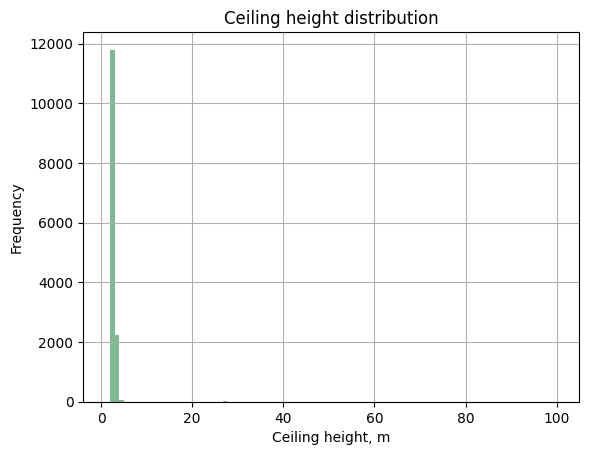

In [61]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100)

#assigning axes and titles
plt.title('Ceiling height distribution')
plt.ylabel('Frequency')
plt.xlabel('Ceiling height, m');

Let's remove abnormally high values of 5 meters and above.

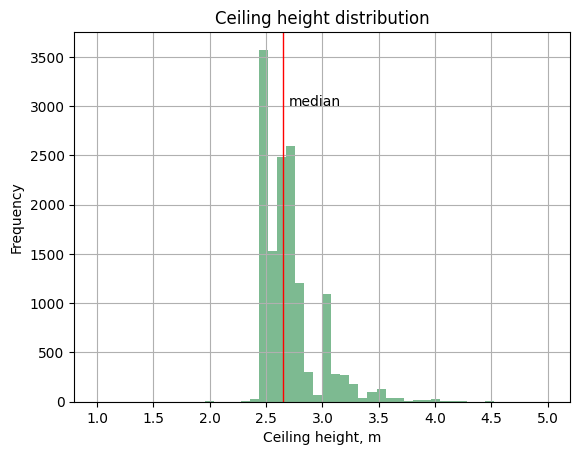

In [62]:
data['ceiling_height'].hist(bins=50,range=(1,5))

plt.axvline(data['ceiling_height'].median(), color='r', linestyle='-', linewidth=1)
plt.text(2.7,3000,'median',rotation=0)

#assigning axes and titles
plt.title('Ceiling height distribution')
plt.ylabel('Frequency')
plt.xlabel('Ceiling height, m');

Peaks are clearly visible around the values of 2.5, 2.7, 3\
The data description indicates the maximum value in the column is 100 meters. This must be an error.

Let's make a data slice with ceilings of meters and more and study it.

In [63]:
#display the number of unique ceiling heights of 5 meters and higher
data.query('ceiling_height >= 5')['ceiling_height'].value_counts()

ceiling_height
27.000     8
25.000     7
8.000      3
32.000     2
5.000      1
24.000     1
26.000     1
8.300      1
5.300      1
14.000     1
20.000     1
22.600     1
5.800      1
27.500     1
10.300     1
100.000    1
Name: count, dtype: int64

If 5-meter ceilings can exist in apartments with a 2-story layout, then 100 and 27 are already an anomaly. It is logical to assume that the person filling out the questionnaire made a mistake and entered a value an order of magnitude greater.

Let's divide all values over 10 meters by 10.

In [64]:
def ceiling_fix(row):
    '''
    function looks for values ​​in the ceiling_height column
    and divides them by 10 if they are greater than 10
    '''
    if row['ceiling_height'] >= 10:
        return row['ceiling_height']/10
    else:
        return row['ceiling_height']


#create the 'floor_category' column using the floor_group function
data['ceiling_height'] = data.apply(ceiling_fix, axis=1)

In [65]:
#let's count the number of ads with ceilings of 5 meters or more
len(data.query('ceiling_height >= 5'))

8

There are only 8 lines, let's delete them as outliers.

In [66]:
#delete outliers
data = data.query('ceiling_height < 5 or ceiling_height.isna()')

Now let's pay attention to the abnormally small values

In [67]:
#create a data slice according to the required conditions and display unique values and their number on the screen
data.query('ceiling_height <= 2')['ceiling_height'].value_counts()

ceiling_height
2.000    12
1.200     1
1.400     1
1.750     1
1.030     1
1.000     1
Name: count, dtype: int64

Let's delete all lines with a height of less than 2 meters as outliers.

In [68]:
#delete outliers
data = data.query('ceiling_height >= 2 or ceiling_height.isna()')

In [69]:
#sort again and look at the unique values
data['ceiling_height'].value_counts().head(10)

ceiling_height
2.500    3518
2.600    1644
2.700    1566
3.000    1018
2.550     979
2.800     977
2.750     899
2.650     676
3.200     246
3.100     178
Name: count, dtype: int64

**Observation:** The most common ceiling height is 2.5 meters.

#### Floor_category
Let's apply the describe() method to the column and build a histogram

count     23118
unique        3
top       other
freq      17025
Name: floor_category, dtype: object

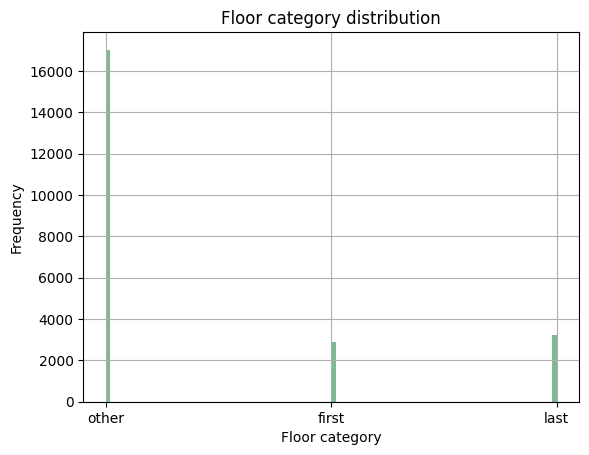

In [70]:
display(data['floor_category'].describe())
data['floor_category'].hist(bins=100)

#assigning axes and titles
plt.title('Floor category distribution')
plt.ylabel('Frequency')
plt.xlabel('Floor category');

Since there are only three unique values ​​in this column, it will be clearer to use the value_counts() method.

In [71]:
data['floor_category'].value_counts()

floor_category
other    17025
last      3207
first     2886
Name: count, dtype: int64

**Observation:** Apartments on the 1st floor are sold slightly less frequently than those on the top floor, and the category `other` is the largest, which is not surprising, since it includes all floors except the 1st and top floors.

#### Total number of floors
Let's apply the describe() method to the column and build a histogram

count   23033.000
mean       10.735
std         6.625
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

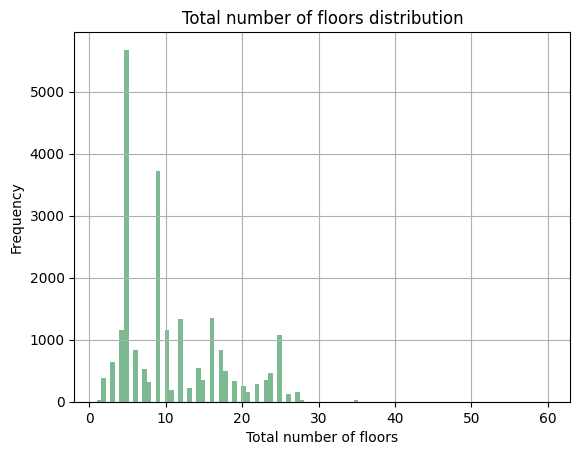

In [72]:
display(data['floors_total'].describe())
data['floors_total'].hist(bins=100)

#assigning axes and titles
plt.title('Total number of floors distribution')
plt.ylabel('Frequency')
plt.xlabel('Total number of floors');

Let's cut abnormally large values. 

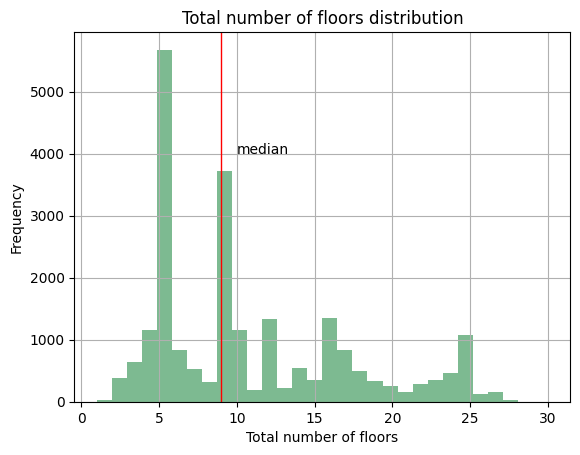

In [73]:
data['floors_total'].hist(bins=30,range=(1,30))

plt.axvline(data['floors_total'].median(), color='r', linestyle='-', linewidth=1)
plt.text(10,4000,'median',rotation=0)

#assigning axes and titles
plt.title('Total number of floors distribution')
plt.ylabel('Frequency')
plt.xlabel('Total number of floors');

The most pronounced peaks are 5 and 9 floors.\
Let's look at the most common buildings:

In [74]:
data['floors_total'].value_counts().head()

floors_total
5.000     5676
9.000     3725
16.000    1358
12.000    1340
4.000     1153
Name: count, dtype: int64

Теперь отсортируем аномальные значения в 30 этажей и более.

In [75]:
#count the abnormal values of 30 floors and above.
len(data.query('floors_total >= 30'))

31

In [76]:
#look at listings in buildings of 30 floors and above.
data.query('floors_total >= 30').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
397,15,5.990,54.000,2018-03-22,2,NaN,36.000,21.400,28,False,False,False,18.700,1,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,11.000,110925.930,3,3,2018,20.000,other,54.000,21.000
871,14,7.778,75.000,2017-11-16,2,NaN,35.000,40.500,23,False,False,False,11.700,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,169.000,103703.703,3,11,2017,20.000,other,75.000,40.000
1060,10,5.200,50.000,2015-11-06,2,NaN,35.000,39.000,15,False,False,False,20.500,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,281.000,104000.000,4,11,2015,20.000,other,50.000,39.000
1697,11,3.550,28.000,2018-02-08,1,2.650,34.000,18.000,23,False,False,False,NaN,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,410.000,126785.711,3,2,2018,20.000,other,28.000,18.000
1917,13,10.150,74.000,2017-11-17,2,2.800,35.000,34.400,30,False,False,False,13.000,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,137162.156,4,11,2017,20.000,other,74.000,34.000
2253,12,3.800,45.500,2018-06-28,2,2.880,60.000,27.400,4,False,False,False,7.400,0,Кронштадт,67763.000,49488.000,2,342.000,3,614.000,166.000,83516.477,3,6,2018,49.000,other,46.000,27.000
2966,9,4.300,37.000,2017-08-08,1,NaN,35.000,14.000,15,False,False,False,10.400,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,50.000,116216.219,1,8,2017,20.000,other,37.000,14.000
4855,12,5.500,50.000,2017-06-22,1,2.800,35.000,22.000,4,False,False,False,13.000,0,Санкт-Петербург,18627.000,20339.000,1,609.000,3,145.000,537.000,110000.000,3,6,2017,20.000,other,50.000,22.000
5749,20,3.590,25.000,2017-08-30,1,2.800,35.000,NaN,26,False,False,True,NaN,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,198.000,143600.000,2,8,2017,20.000,other,25.000,NaN
5807,17,8.150,80.000,2019-01-09,2,2.700,36.000,41.000,13,False,False,False,12.000,5,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,38.000,101875.000,2,1,2019,20.000,other,80.000,41.000


Apparently, almost all apartments in the category `building 30 floors or more` are in the same high-rise.
Since most of them have the same distance to the airport, city center, etc.

Let's remove the rows with outlier values of 30 floors and above.

In [77]:
data = data.query('floors_total <= 30 or floors_total.isna()')

Apparently, almost all apartments in the category `building 30 floors or more` are in the same high-rise.
Since most of them have the same distance to the airport, city center, etc.

**Observation:** Most often there are 5-story buildings

#### Distance to the city center
Let's apply the describe() method to the column and build a histogram

count   17585.000
mean    14415.198
std      8582.539
min       208.000
25%      9700.000
50%     13235.000
75%     16414.000
max     65968.000
Name: city_centers_nearest, dtype: float64

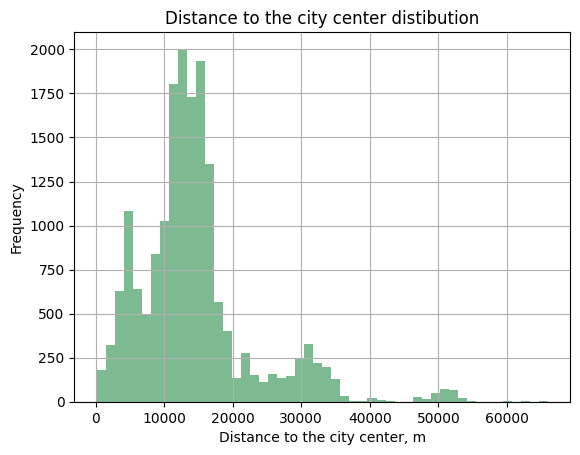

In [78]:
display(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=50)

#assigning axes and titles
plt.title('Distance to the city center distibution')
plt.ylabel('Frequency')
plt.xlabel('Distance to the city center, m');

Let's limit the histogram values to cut outliers

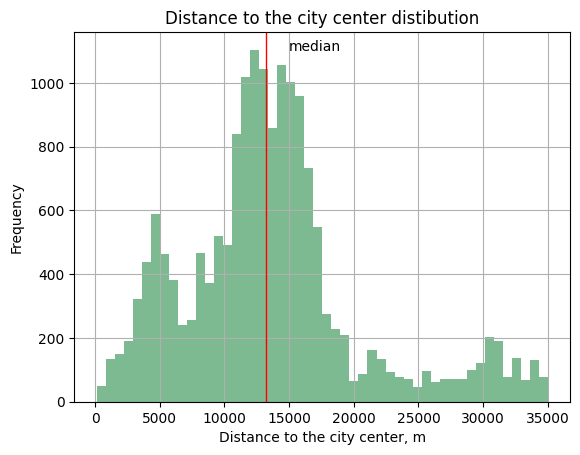

In [79]:
data['city_centers_nearest'].hist(bins=50,range=(150,35000))

plt.axvline(data['city_centers_nearest'].median(), color='r', linestyle='-', linewidth=1)
plt.text(15000,1100,'median',rotation=0)

#assigning axes and titles
plt.title('Distance to the city center distibution')
plt.ylabel('Frequency')
plt.xlabel('Distance to the city center, m');

Есть несколько пиков в районе 5000 м и 13000 м (медиана). Возможно это зависит от типа и размеров поселений.\
Обратим внимание на аномалии.

In [80]:
data.query('city_centers_nearest > 45000')['locality_name'].value_counts()

locality_name
Ломоносов      123
Кронштадт       94
Петергоф        24
Зеленогорск     24
Молодежное       5
Репино           1
Name: count, dtype: int64

All settlements above are cities or towns within Saint Petersburg, so the geoservice calculated the distance not to the center of the settlement, but to the center of Saint Petersburg.

Let's delete these lines.

In [81]:
data = data.query('city_centers_nearest < 45000 or city_centers_nearest.isna()')

**Observation:** The most common distance to the city center is about 13 km (close to the median value)
interesting distribution, I think we should look deeper into the reason for the second peak in the histogram.

#### Distance to the nearest park

Let's apply the describe() method to the column and build a histogram

count   7557.000
mean     496.812
std      344.009
min        1.000
25%      294.000
50%      458.000
75%      617.000
max     3190.000
Name: parks_nearest, dtype: float64

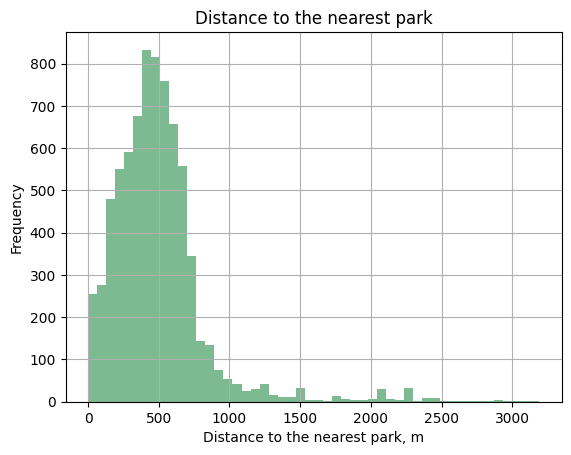

In [82]:
display(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=50)

#assigning axes and titles
plt.title('Distance to the nearest park')
plt.ylabel('Frequency')
plt.xlabel('Distance to the nearest park, m');

Let's limit the histogram values to cut outliers

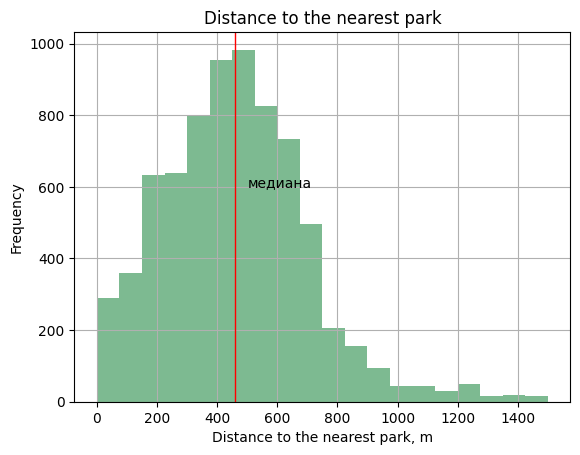

In [83]:
data['parks_nearest'].hist(bins=20,range=(0,1500))

plt.axvline(data['parks_nearest'].median(), color='r', linestyle='-', linewidth=1)
plt.text(500,600,'медиана',rotation=0)

#assigning axes and titles
plt.title('Distance to the nearest park')
plt.ylabel('Frequency')
plt.xlabel('Distance to the nearest park, m');

The peak of the histogram is near to the median.
Let's pay attention to the anomalies.

In [84]:
data.sort_values(by='parks_nearest', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
10959,9,3.000,31.100,2017-03-21,1,NaN,5.000,17.700,2,False,False,False,5.500,0,Санкт-Петербург,14821.000,9734.000,0,3190.000,1,431.000,234.000,96463.023,1,3,2017,10.000,other,31.000,18.000
19430,9,3.900,30.500,2018-02-22,1,2.600,5.000,16.500,1,False,False,False,5.500,0,Санкт-Петербург,14821.000,9734.000,0,3190.000,1,431.000,176.000,127868.852,3,2,2018,10.000,first,30.000,16.000
1590,3,7.500,70.000,2017-07-11,2,NaN,18.000,37.000,13,False,False,False,10.000,0,Санкт-Петербург,14878.000,9791.000,0,3064.000,1,264.000,4.000,107142.859,1,7,2017,10.000,other,70.000,37.000
19208,17,14.950,187.000,2017-10-12,5,3.000,2.000,80.000,2,False,False,False,17.000,1,Санкт-Петербург,36805.000,8656.000,0,3013.000,3,537.000,49.000,79946.523,3,10,2017,9.000,last,187.000,80.000
23080,15,4.650,44.500,2018-02-20,2,NaN,5.000,25.200,2,False,False,False,5.500,1,Санкт-Петербург,14965.000,9877.000,1,2984.000,1,284.000,152.000,104494.383,1,2,2018,10.000,other,44.000,25.000


We have already encountered the first 4 rows when we filled in the gaps.
Since this column is logically subordinate to the neighboring `parks_around3000`, we will delete all rows with parks located more than 3000 m away.

In [85]:
data = data.query('parks_nearest <= 3000 or parks_nearest.isna()')

**Observation:** On average, parks are located at a distance of 450 m., there is almost always a park within 1 km.

#### Interim conclusion

We have studied and described the main parameters, corrected anomalies where possible and removed outliers.

**Observations at this stage:**
* The most common one-room apartments are 42 and 46 m².
* The standard ceiling height is 2.5 meters, the main types of living space are 17 and 18 m², 30-meter apartments are also common.
* The most common kitchen area is 6, 10 and 8 m².
* On average, parks are located at a distance of 450 m and closer, there is almost always a park within 1 km.
* The city center is often less than 17 km away, with the most common distance to the center being 13 km.
* There are offers for all floors, but the first floor is slightly less common than the last.
* Five-story buildings are common.

### Average time for selling an apartment

In [86]:
#round the values in the column
data['days_exposition'] = round(data['days_exposition'],0)

count   19831.000
mean      178.112
std       216.577
min         1.000
25%        45.000
50%        94.000
75%       227.000
max      1580.000
Name: days_exposition, dtype: float64

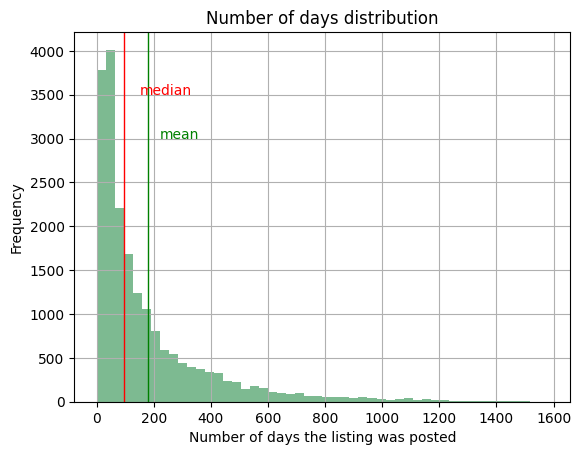

In [87]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=50)

plt.axvline(data['days_exposition'].median(), color='r', linestyle='-', linewidth=1)
plt.axvline(data['days_exposition'].mean(), color='g', linestyle='-', linewidth=1)

plt.text(150,3500,'median',color='r',rotation=0)
plt.text(220,3000,'mean',color='g',rotation=0)

#assigning axes and titles
plt.title('Number of days distribution')
plt.ylabel('Frequency')
plt.xlabel('Number of days the listing was posted');

Let's zoom in on the histogram peak and make it more granular.

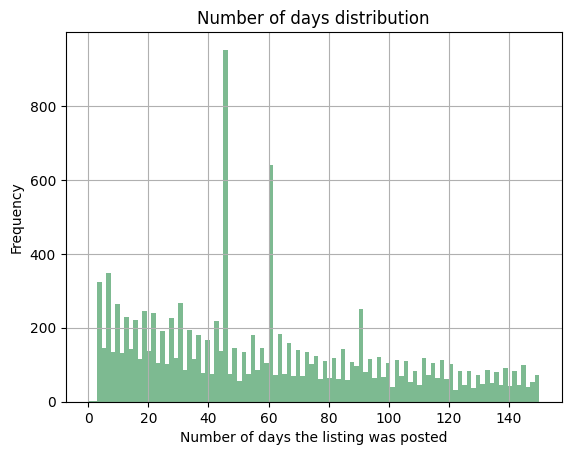

In [88]:
data['days_exposition'].hist(bins=100,range=(0,150))

#assigning axes and titles
plt.title('Number of days distribution')
plt.ylabel('Frequency')
plt.xlabel('Number of days the listing was posted');

Several values ​​stand out greatly, let's clarify which ones exactly.

In [89]:
#output top 10 frequent unique values in the column
data['days_exposition'].value_counts().head(10)

days_exposition
45.000    864
60.000    533
7.000     227
30.000    204
90.000    183
4.000     173
3.000     152
5.000     145
14.000    143
9.000     138
Name: count, dtype: int64

#### Interim conclusion

**On average, ads are published for 45 days.**

You can also notice that in the top unique values, in addition to 45 days, there are other “round” values: 60 days (2 months), 7 days (week), 30 days (month), 90 days (3 months).
There is a hypothesis that this is due to the settings for the publication period, and not because the apartment was actually sold, and the ad was removed. Perhaps, most often, the ad simply became outdated and went to the archive. We do not know whether the apartment was sold.

To determine unusually long publications, let's go back to the histogram. At a value of 600 days, the values are already rare. At a value of 1000, the histogram merges with zero.

To determine fast sales, let's turn to the median. Since we do not need to determine abnormally fast sales, we will assume that fast means all publications shorter than 94 days.

It is also worth remembering that this dataset column may have missing values on days 1 and 2. This could have affected the statistics.

### Factors that most influence the total cost of an object.

Let's select the columns we need to study in a separate list and construct scatterplots for quantitative variables:

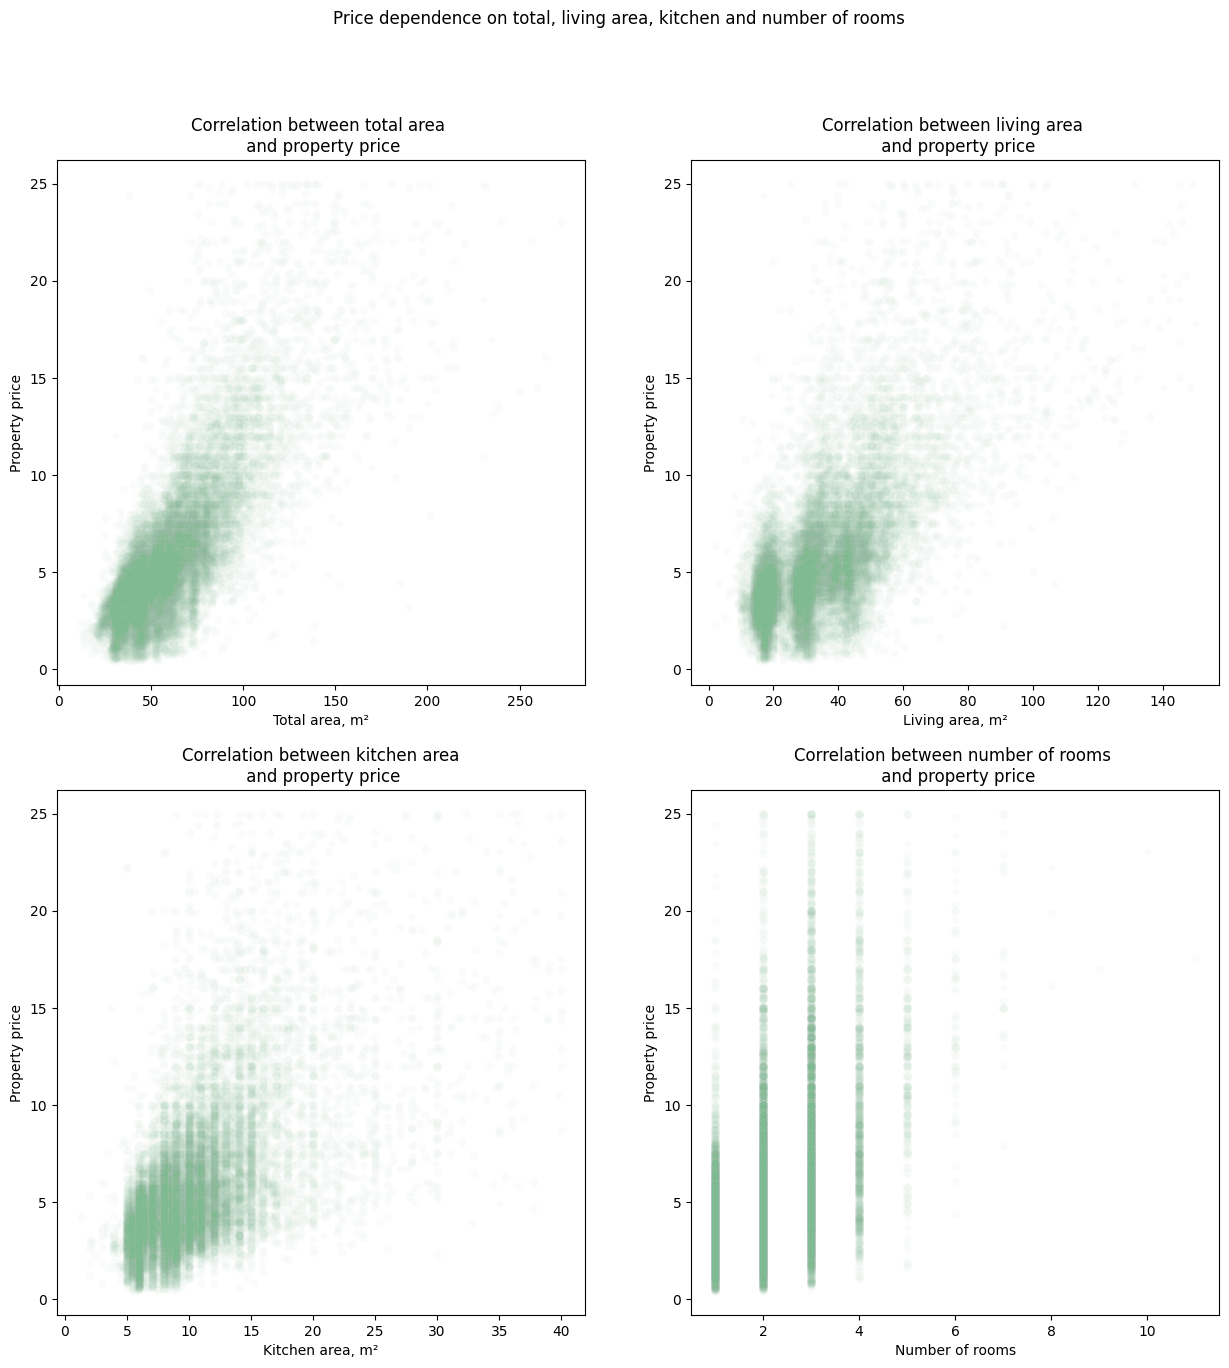

In [90]:
figure, axes = plt.subplots(2, 2, figsize=(15,15))
figure.suptitle('Price dependence on total, living area, kitchen and number of rooms')

sns.scatterplot(ax=axes[0, 0], data=data, x='total_area', y='last_price',alpha=0.03)
axes[0, 0].set_title('Correlation between total area \n and property price')
axes[0, 0].set_xlabel('Total area, m²')
axes[0, 0].set_ylabel('Property price')

sns.scatterplot(ax=axes[0, 1], data=data, x='living_area', y='last_price',alpha=0.03)
axes[0, 1].set_title('Correlation between living area \n and property price')
axes[0, 1].set_xlabel('Living area, m²')
axes[0, 1].set_ylabel('Property price')

sns.scatterplot(ax=axes[1, 0], data=data, x='kitchen_area', y='last_price',alpha=0.03)
axes[1, 0].set_title('Correlation between kitchen area\n and property price')
axes[1, 0].set_xlabel('Kitchen area, m²')
axes[1, 0].set_ylabel('Property price')

sns.scatterplot(ax=axes[1, 1],data=data, x='rooms', y='last_price',alpha=0.03)
axes[1, 1].set_title('Correlation between number of rooms \n and property price')
axes[1, 1].set_xlabel('Number of rooms')
axes[1, 1].set_ylabel('Property price');

For quantitative parameters, we will also calculate the Pearson correlation coefficient.

In [91]:
#sheet of columns with quantitative parameters
correlation_list = ['total_area', 'living_area', 'kitchen_area', 'rooms']

for column in correlation_list:
    try:
        print('Pearson correlation coefficient berween total cost and', str(column), 'is', round(data['last_price'].corr(data[column]),2))
    except:
        pass

Pearson correlation coefficient berween total cost and total_area is 0.78
Pearson correlation coefficient berween total cost and living_area is 0.68
Pearson correlation coefficient berween total cost and kitchen_area is 0.59
Pearson correlation coefficient berween total cost and rooms is 0.51


Let's build a bar chart for categorical parameters.

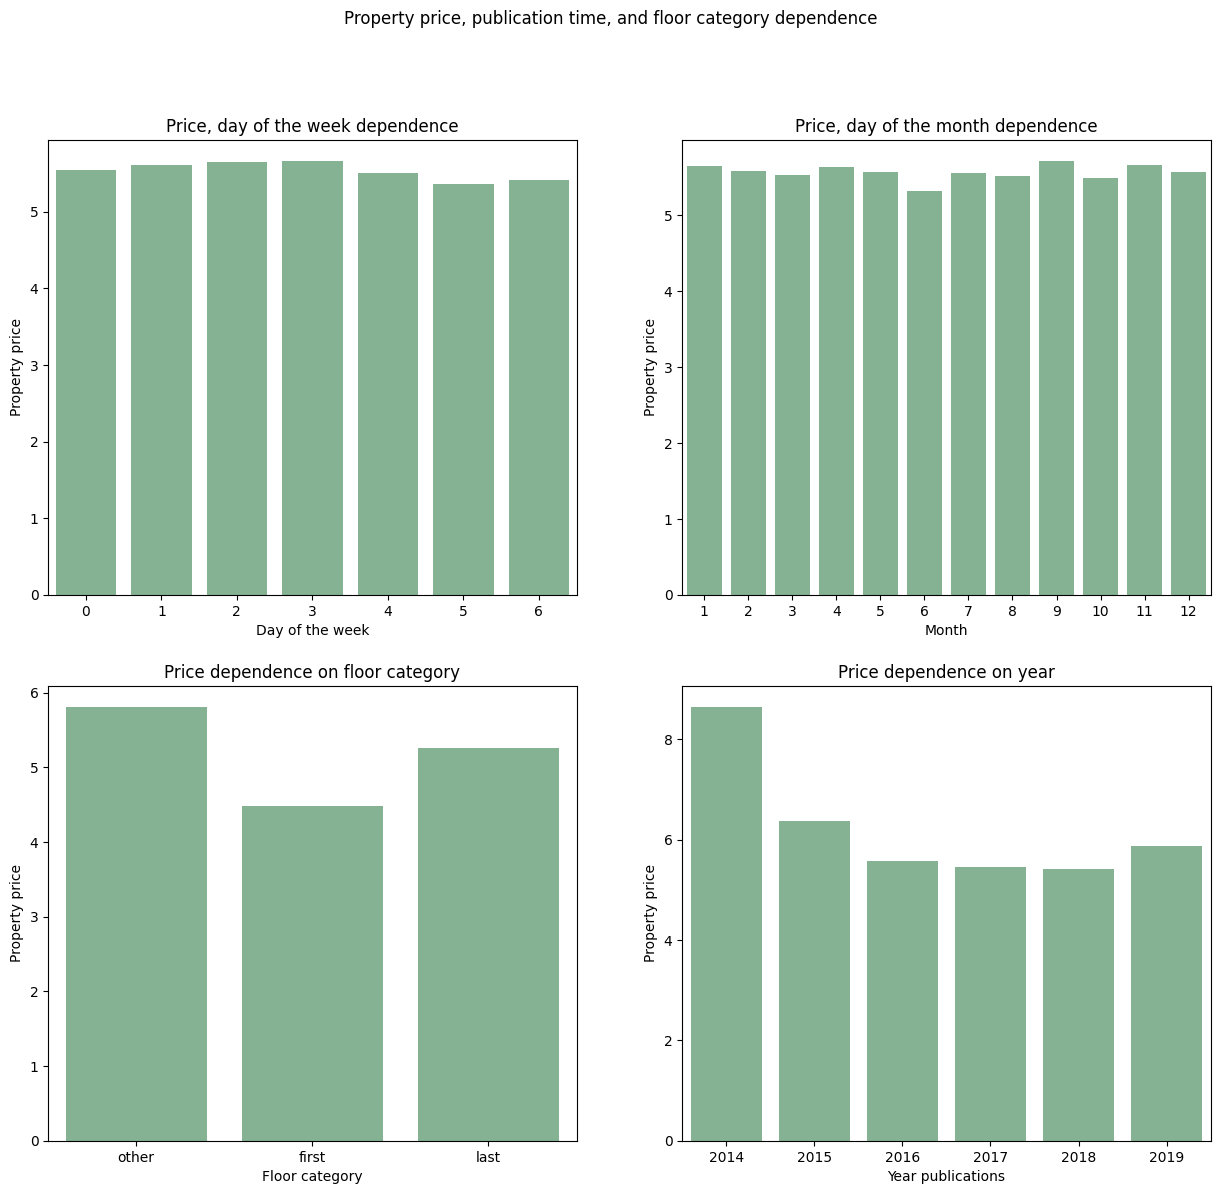

In [92]:
figure, axes = plt.subplots(2, 2, figsize=(15,13))
figure.suptitle('Property price, publication time, and floor category dependence')

sns.barplot(ax=axes[0, 0], data=data, x='weekday', y='last_price',errorbar=None)
axes[0, 0].set_title('Price, day of the week dependence')
axes[0, 0].set_xlabel('Day of the week')
axes[0, 0].set_ylabel('Property price')

sns.barplot(ax=axes[0, 1], data=data, x='month', y='last_price',errorbar=None)
axes[0, 1].set_title('Price, day of the month dependence')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Property price')

sns.barplot(ax=axes[1, 0], data=data, x='floor_category', y='last_price',errorbar=None)
axes[1, 0].set_title('Price dependence on floor category')
axes[1, 0].set_xlabel('Floor category')
axes[1, 0].set_ylabel('Property price')

sns.barplot(ax=axes[1, 1],data=data, x='year', y='last_price',errorbar=None)
axes[1, 1].set_title('Price dependence on year')
axes[1, 1].set_xlabel('Year publications')
axes[1, 1].set_ylabel('Property price');

#### Interim conclusion

* **Dependence of price on total area** — there is a pronounced positive correlation (0.78). This is especially noticeable for indicators up to 100 sq. m. and up to 10,000,000 rubles. Then the values ​​become less consistent.

* **Dependence of price on living area** — there is also a positive correlation, but it is not as pronounced (0.68).

* **Dependence of price on kitchen area** — a positive correlation is still present, but its value is smaller (0.59). It is traced up to indicators of 13 sq. m. and a cost of 8 million rubles, after which the values ​​become inconsistent.

* **Dependence of price on the number of rooms** — there is a positive correlation (0.51). It can be noted that the average starting price for one-, two- and three-room apartments is almost the same, but the upper limit increases along with the number of rooms in the apartment.

* **Dependence of the price on the floor on which the apartment is located** — on average, apartments on the first floor are the most affordable. The most expensive apartments are located outside the first and last floors.

* **Dependence of the cost on the date of publication of the ad** — the average price does not depend on the day or month of publication. The highest prices were recorded in 2014, after which they gradually decreased until 2018, and then increased slightly.

* **Price per square meter depending on location** — the cost per square meter is the lowest in Staropolye and the highest in St. Petersburg.

* **The influence of distance from the center on the cost of apartments in St. Petersburg** — with an increase in the distance from the center, the average cost decreases. However, there is a suspicious jump in price in the area of ​​27 km from the center.

### Average price per square meter in 10 localities with the largest number of ads

Let's display the top 10 settlements by the number of ads

In [93]:
#create a data slice with the required columns and save it to a new variable
data_slice = data[['locality_name', 'square_meter_price']]

#make a pivot table and rename the columns
data_pivot = data_slice.pivot_table(index='locality_name',aggfunc=[ 'count','mean'])
data_pivot.columns = ['total_ads', 'average_price']

#sort the table by the number of ads and display the top 10
data_pivot.sort_values(by='total_ads', ascending=False).head(10)

,total_ads,average_price
locality_name,,
Санкт-Петербург,15128,109630.023
Мурино,589,86087.266
Кудрово,472,95324.930
Шушары,439,78703.266
Всеволожск,398,68654.469
Пушкин,359,102209.430
Колпино,337,75333.297
Парголово,327,90175.914
Гатчина,307,68746.148


Let's visualize this data on a graph.

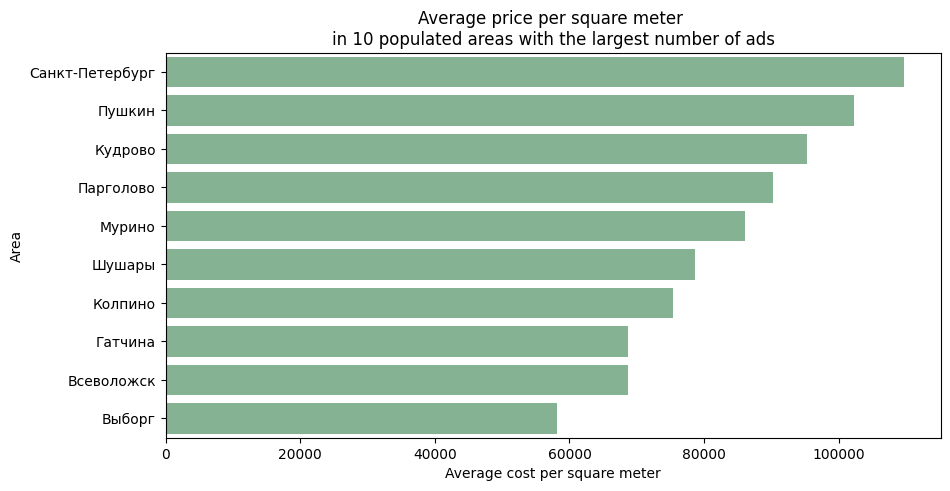

In [94]:
#create a list of top published locations
top_locations_list = data_pivot.sort_values(by='total_ads', ascending=False).head(10)
top_locations_list = top_locations_list.index.to_list()

#create the required data slice
top_locations_data_slice = data.query('locality_name in @top_locations_list')

#display a graph sorted in descending order
plt.figure(figsize=(10, 5))

order = top_locations_data_slice.groupby(['locality_name'])['square_meter_price'].mean().sort_values(ascending=False).index
sns.barplot(data=top_locations_data_slice, x='square_meter_price', y='locality_name', order=order, errorbar=None)

#assigning axes and titles
plt.title('Average price per square meter \nin 10 populated areas with the largest number of ads')
plt.xlabel('Average cost per square meter')
plt.ylabel('Area');

In [95]:
#display top 5 most expensive locations
data_pivot.sort_values(by='average_price', ascending=False).head(5)

,total_ads,average_price
locality_name,,
Кронштадт,1,111470.594
Санкт-Петербург,15128,109630.023
Пушкин,359,102209.430
Сестрорецк,182,101912.344
Лисий Нос,3,100660.812


In [96]:
#display top 5 most inexpensive locations
data_pivot.sort_values(by='average_price', ascending=True).head()

,total_ads,average_price
locality_name,,
Старополье,3,11206.220
Свирь,2,11481.480
Вахнова Кара,1,11688.310
Выскатка,2,12335.484
Совхозный,2,12629.130


#### Interim conclusion

The cheapest real estate is in Staropolye, and the most expensive is in St. Petersburg (formally, the leader is Kronstadt, but since only one line was involved in the calculation, and above we cut off the abnormally expensive apartments located in St. Petersburg, it can be ignored.

### Correlation between the price of apartments in St. Petersburg and the distance from the center

For calculations we will need two columns `last_price` and `city_centers_nearest_km`.

In [97]:
#create a data slice with the required columns and save it to a new variable
data_slice_peterburg = data.query('locality_name == "Санкт-Петербург"')[['last_price','city_centers_nearest_km']]
#create a pivot table and sort the values by kilometers from the center
data_pivot_peterburg = data_slice_peterburg.pivot_table(index='city_centers_nearest_km')
#change the column name
data_pivot_peterburg.columns = ['average_price']

data_pivot_peterburg.head()

,average_price
city_centers_nearest_km,
0.000,10.199
1.000,10.990
2.000,10.606
3.000,9.410
4.000,9.842


Let's plot a graph of the change in the average price for each kilometer from the center of St. Petersburg.

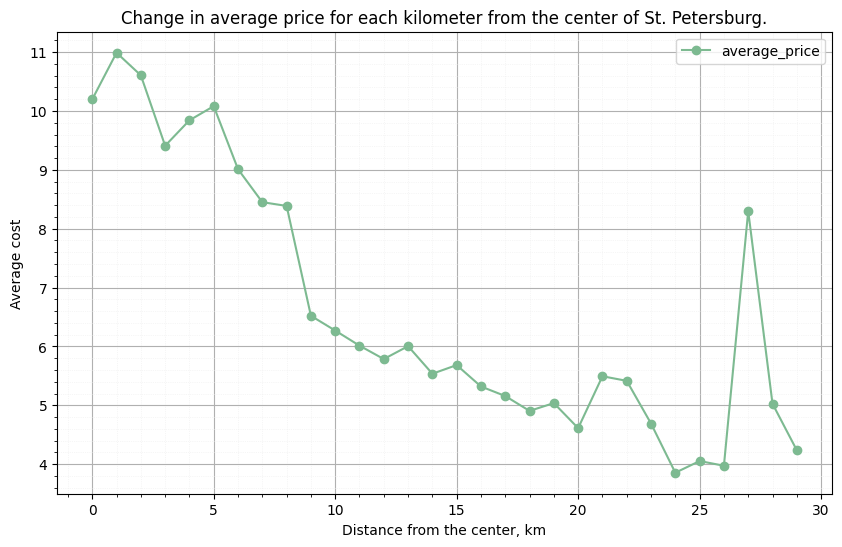

In [98]:
ax = data_pivot_peterburg.plot(style='o-', grid=True, figsize=(10, 6))
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

ax.minorticks_on()

#assigning axes and titles
plt.title('Change in average price for each kilometer from the center of St. Petersburg.')
plt.xlabel('Distance from the center, km')
plt.ylabel('Average cost');

In [99]:
print('Pearson correlation coefficient berween average price and distance from the center is ',
      round(data_slice_peterburg['last_price'].corr(data['city_centers_nearest_km']),2))


Pearson correlation coefficient berween average price and distance from the center is  -0.42


#### Interim conclusion

As you move away from the center, the average price falls, but there is a suspicious price jump around 27 km.
Maybe there is some elite area there?

After 8-9 km, you may notice a sharp drop in price. Perhaps the central area of the city ends there?

Also, due to rounding of values, a "zero" kilometer appeared, which means that the city center is less than 500 m.
It is interesting that within its limits the price is slightly less than at a distance of 1 km (500 m-1500 m).
Probably it is worth clarifying what the geoservice takes for the point of the center of St. Petersburg,
in order to better understand this phenomenon.

## Research results

**Data preprocessing:**

* unified the column names,
* identified missing values in columns and filled them where possible. We left gaps where it was not possible to find a logical replacement. We paid attention to those columns where gaps are appropriate,
* checked and changed data types where appropriate,
* removed partial duplicates (no exact duplicates were found),
* created several columns with new parameters.

**In the framework of the study:**

We studied and described the main parameters, corrected anomalies where possible, removed outlying values.

**Main observations:**
* One-room apartments with an area of 42 and 46 square meters are most common.
* The standard ceiling height is 2.5 meters.
* Residential area of apartments usually makes up 17 or 18 square meters, but apartments with an area of 30 square meters also often occur.
* Kitchen areas on average make up 6, 8 or 10 square meters.
* Parks are usually located no more than 450 meters from houses. There is almost always a park within one kilometer.
* Distance to the city center is usually less than 17 kilometers, and the most common distance is 13 kilometers.
* Offers for sale are available on all floors, but the ground floor is slightly less common than the top floor.
* Five-story buildings are common.

**Real estate price** — The most common real estate cost is about 3.5 million. Most ads are in the price range from 0.43 to 10 million rubles, and the median value is 4.6 million rubles.

In our study, we found out the average price per square meter in 10 localities with the largest number of ads.

**Average time for selling an apartment:**

The average period for posting an apartment sale ad on the platform is 45 days. Sales with a period shorter than the median value of 94 days can be considered fast, which indicates that sales generally happen quickly. Offers with a duration of more than 20 months can be considered abnormally long publications.


**The market value of real estate objects depends on many factors. We found out that the following parameters most affect the price:**

* total area;
* living space;
* number of rooms;
* floor where the apartment is located;
* location;
* distance from the center.

**Automation recommendations.**

* It is necessary to analyze the algorithm for obtaining data in the «days_exposition» column. It is worth finding out why the values of 1 and 2 days disappear. You should also pay attention to the frequency of posting ads for a week, 30, 45, 60 and 90 days — perhaps this is related to publication settings.

* In the questionnaire, it is necessary to make fields that are filled in manually mandatory (for example, in the «is_apartment» field, you can automatically choose from two values: «Yes» or «No»). It is also worth automatically filling in the field with the name of the location and adding automatic verification of the format of the data entered by the user.

* It is necessary to clarify information about the area, which is located at a distance of 27 km from the city center, to understand the reason for the high average cost of housing in this area.